In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

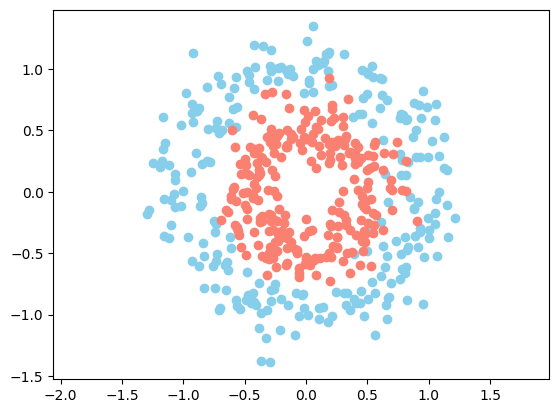

In [2]:
n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.15)
Y = Y[:, np.newaxis]
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='skyblue')
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='salmon')
plt.axis('equal')
plt.show()

In [3]:
# Clase de la capa de la red
class neural_layer():
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = np.random.rand(1, n_neur) * 2 - 1
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1

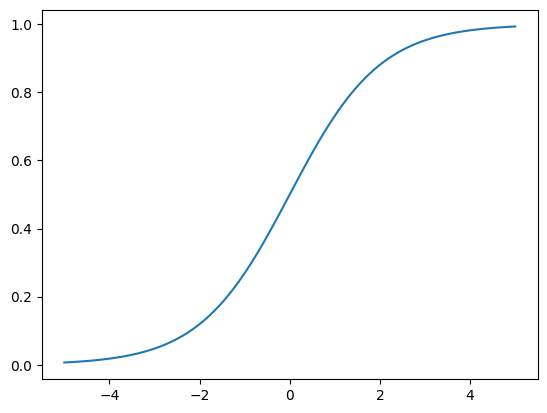

In [4]:
# Funciones de activación:
sigm = (lambda x: 1 / (1 + np.exp(-x)),
        lambda x: x * (1 - x)
        )


def relu(x): return np.maximum(0, x)


_x = np.linspace(-5, 5, 100)

plt.plot(_x, sigm[0](_x))
plt.show()

In [5]:
# Creamos nuestra red neuronal
def create_nn(topology, act_f):
    nn = []
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], act_f))

    return nn

In [6]:
topology = [p, 4, 8, 1]
neural_net = create_nn(topology, sigm)
l2_cost = (lambda Yp, Yr: np.mean(Yp - Yr) ** 2,
           lambda Yp, Yr: (Yp - Yr))


def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
    out = [(None, X)]
    # fordward pass:
    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        out.append((z, a))

    # backpropagation:
    if train:
        # Backward pass
        deltas = []
        for l in reversed(range(0, len(neural_net))):

            z = out[l+1][0]
            a = out[l+1][1]

            if l == len(neural_net) - 1:
                # delta ultima capa
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))

            else:
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
                # delta capa

            _W = neural_net[l].W
            # Gradient descent
            neural_net[l].b = neural_net[l].b - \
                np.mean(deltas[0], axis=0, keepdims=True) * lr
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
    return out[-1][1]


train(neural_net, X, Y, l2_cost, 0.5)
print('')

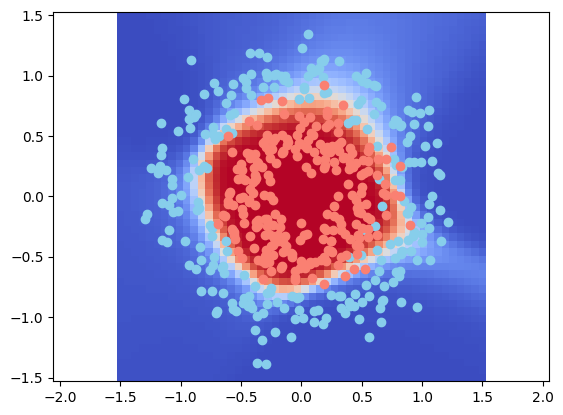

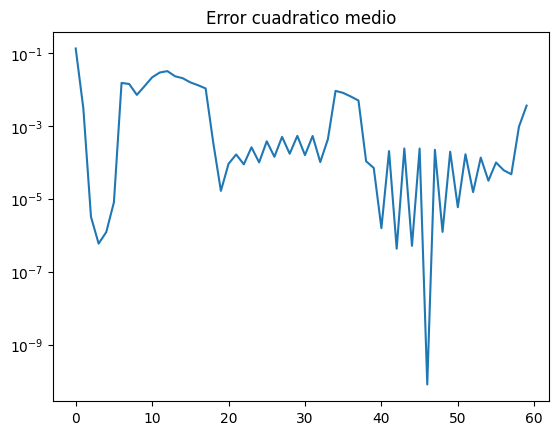

In [8]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(1500):

    pY = train(neural_n, X, Y, l2_cost, lr=0.05)

    if i % 25 == 0:

        loss.append(l2_cost[0](pY, Y))

        res = 50

        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)

        _Y = np. zeros((res, res))

        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_n, np.array(
                    [[x0, x1]]), Y, l2_cost, train=False)[0][0]

        plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
        plt.axis('equal')

        plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='skyblue')
        plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='salmon')

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.yscale('log')
        plt.title('Error cuadratico medio')
        plt.show()
        time.sleep(0.5)

# Vamos a probar con Make Moons!


In [9]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

In [35]:
# Añadimos la función tangente hiperbólica para probar con ella.
tanh = (lambda x: 2 / (1 + np.exp(-2*x)) - 1,
        lambda x: 1 - tanh[0](x)
        )

cross_entropy = (lambda Yp, Yr: np.mean(np.where(Yr == 1, -Yr * np.log(Yp), -(1 - Yr) * np.log(1 - Yp))),
                 lambda Yp, Yr: np.where(Yr == 1, -Yr / Yp, (1 - Yr) / (1 - Yp)))


l2_cost = (lambda Yp, Yr: np.mean(Yp - Yr) ** 2,
           lambda Yp, Yr: (Yp - Yr))

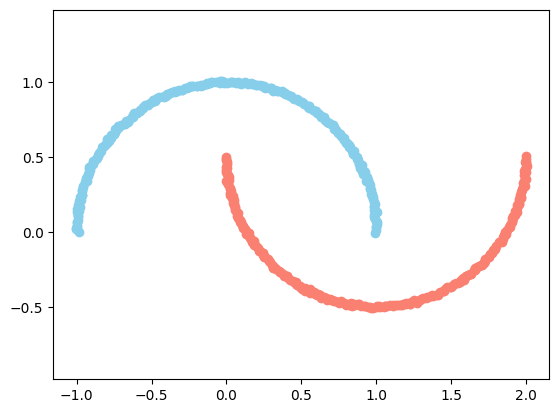

In [49]:
n = 500
p = 2

X, Y = make_moons(n_samples=n, noise=0.005)
Y = Y[:, np.newaxis]
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='skyblue')
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='salmon')
plt.axis('equal')
plt.show()

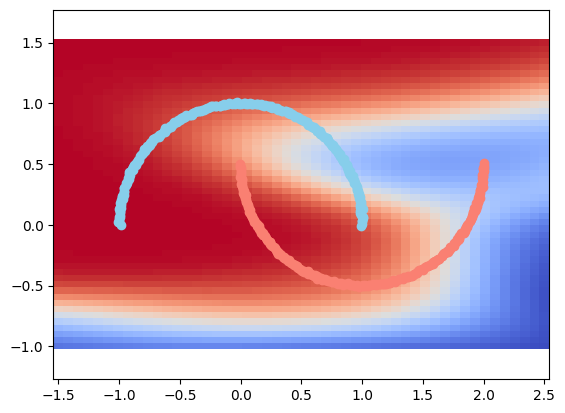

0.07451211842562724


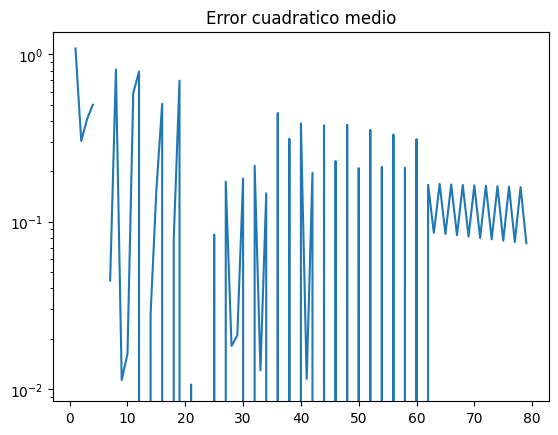

In [50]:
import time
from IPython.display import clear_output


topology = [p,  100,  1]
neural_n = create_nn(topology, tanh)

loss = []

for i in range(2000):

    pY = train(neural_n, X, Y, l2_cost, lr=0.0005)

    if i % 25 == 0:

        loss.append(cross_entropy[0](pY, Y))

        res = 50

        _x0 = np.linspace(-1.5, 2.5, res)
        _x1 = np.linspace(-1, 1.5, res)

        _Y = np. zeros((res, res))

        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_n, np.array(
                    [[x0, x1]]), Y, cross_entropy, train=False)[0][0]

        plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
        plt.axis('equal')

        plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='skyblue')
        plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='salmon')

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.yscale('log')
        plt.title('Error cuadratico medio')
        print(loss[-1])
        plt.show()
        time.sleep(0.5)